![Director Shot](images/director_shot.jpeg)

# Project Microsoft Movie Analysis

**Author:** Rebecca Chu
***

## Overview

Microsoft is creating a new movie studio and has requested an analysis into the types of films that are successful at the box office. I utilised data from three online movie databases, The Numbers, The Movie Database (TMDb), and IMDb, to examine which films were the most profitable and rated highly amongst audiences. My exploratory data analysis found that the higher the production budget was, the more global profit the movie pulled in, with high-budget films yielding the highest ROI. The data also showed that ROI was generally higher in the summer months of the Northern hemisphere and during holiday season, while movies within the Animation, Adventure, Fantasy and Family genres were the most successful. There appeared to be no relationship between average rating with profitability. Audiences also rated movies with a runtime of 150-180 minutes highly, although further analysis on the impact of runtimes on profitability is needed. 


## Business Problem

Microsoft is looking to create a new movie studio that produces profitable original video content and would like to know the types of movies that are the most successful at the box office. Based on an exploratory data analysis, they are looking for actionable insights that can be implemented to create movies with the highest chance of commercial success and popularity.

In this analysis, success was defined by the return on investment of a film in the context of the overall global profit of the film. I also looked at the average rating of a film to determine audience sentiment and popularity. My analysis aimed to answer the following data questions:

* What is the relationship between production budget and global profit/ profitability?
* Does release month have a relationship on ROI?
* Are certain genres more profitable than other?
* Is there a relationship between average rating and profitability?
* What is the relationship between runtimes and average ratings?

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

## Data Understanding

For this analysis, data was sourced from The Numbers, The Movie Database (TMDb), and IMDb, all of which are online database with extensive metadata for movies.

#### The Numbers

The Numbers data provided financial data for 5,782 movies and was used to determine the profitability of each movie. For this analysis, the target data was the production budget and the worldwide gross, which were used to calculate ROI. ROI was consequently used to assess whether a movie was considered a box office success.

In [2]:
df1 = pd.read_csv('./zippedData/tn.movie_budgets.csv.gz')
df1.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


#### TMDb

TMDb is a community built movie and TV database and their dataset provides information regarding genre, release date, vote average, and lifetime popularity score, all of which are factors that may determine the success of a film. I joined this dataset to The Numbers dataset to analyse the relationship between genre, vote average and the release month with profitability/ ROI.

In [3]:
df2 = pd.read_csv('./zippedData/tmdb.movies.csv.gz')
df2.head()

,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186


#### IMDb

IMDb datasets are available online (https://developer.imdb.com/non-commercial-datasets/) and refreshed daily. So that I was working with the most recent data, I downloaded ```title.basics.tsv.gz``` and ```title.ratings.tsv.gz``` on the 7th of August 2023. These datasets were joined and used to provide an understanding of the relationship between audience ratings and runtimes.

Only movies between 2009 and 2022 were analysed to ensure we were looking within a similar time period as The Numbers and TMDb datasets.

Note: Given the exhaustive nature of ```title.basics.tsv.gz```, I dropped irrelevant information and created a new reduced csv file ```imdb_basics.aug23_reduced.csv.gz``` to work with. For more information please see the ```imdb_do_not_run``` notebook. The original dataset contained 10,058,021 entries, and the csv file I created contained 210,566 entries.

In [4]:
df3 = pd.read_csv('./zippedData/imdb_basics.aug23_reduced.csv.gz')
df3.head()

,Unnamed: 0,tconst,titleType,primaryTitle,startYear,runtimeMinutes,genres
0,0,tt0013274,movie,Istoriya grazhdanskoy voyny,2021,94,Documentary
1,1,tt0052434,movie,"Tuppe tuppe, Marescià!",2023,95,Comedy
2,2,tt0062336,movie,The Tango of the Widower and Its Distorting Mi...,2020,70,Drama
3,3,tt0068865,movie,Lives of Performers,2016,90,Drama
4,4,tt0069049,movie,The Other Side of the Wind,2018,122,Drama


In [5]:
df4 = pd.read_csv('./zippedData/title.ratings.aug23.tsv.gz', sep='\t')
df4.head()

,tconst,averageRating,numVotes
0,tt0000001,5.7,1990
1,tt0000002,5.8,265
2,tt0000003,6.5,1854
3,tt0000004,5.5,178
4,tt0000005,6.2,2640


## Data Preparation

### 1. The Numbers dataset
#### 1.1. Data Cleaning
**Cleaning and converting datatypes of columns**

For this analysis, I focused on films that appealed to an international market and therefore focused on ```worldwide_gross``` rather than ```domestic_gross``` to measure success. I also dropped ```id``` as it was a unique identifier for The Numbers database and not relevant within this analysis.

I updated the column name ```movie``` to ```movie_title```, which will be the standardised column name for film titles used across all dataframes.

In [6]:
# dropping irrelevant columns
df1.drop(['id', 'domestic_gross'], axis=1, inplace=True)

# renaming the movie column name
df1.rename(columns={'movie':'movie_title'}, inplace=True)

In [7]:
# printing the information for the datatframe
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   release_date       5782 non-null   object
 1   movie_title        5782 non-null   object
 2   production_budget  5782 non-null   object
 3   worldwide_gross    5782 non-null   object
dtypes: object(4)
memory usage: 180.8+ KB


We can see that ```production budget``` and ```worldwide_gross``` currently exist as object datatypes and need to be converted to integers. Below, I have defined a function to convert objects to int64 datatypes and applied this function to both columns.

In [8]:
# define function to convert object datatype to int64
def convert_to_int(val):
    """
    Removes special characters "," and "$" from string and converts datatype to int64.
    """
    df1[val] = df1[val].map(lambda x: x.replace(',',''))
    df1[val] = df1[val].map(lambda x: x.strip('$'))
    df1[val] = df1[val].astype('int64')

# apply function to production_budget and worldwide_gross
convert_to_int('production_budget')
convert_to_int('worldwide_gross')

Release date was converted to datetime so that we could analyse and group data by release month.

In [9]:
df1.release_date = pd.to_datetime(df1.release_date)

Now that our data has been reformatted, I looked at the descriptive statistics to review the data available to me.

In [10]:
# printing descriptive statistics to two decimal places
df1.describe().apply(lambda x: x.apply('{0:.2f}'.format))

,release_date,production_budget,worldwide_gross
count,5782.00,5782.00,5782.00
mean,.2f,31587757.10,91487460.91
min,.2f,1100.00,0.00
25%,.2f,5000000.00,4125414.75
50%,.2f,17000000.00,27984448.50
75%,.2f,40000000.00,97645836.50
max,.2f,425000000.00,2776345279.00
std,nan,41812076.83,174719968.78


We can see that the minimum value for ```worldwide_gross``` was 0. It seems highly improbable that a movie would not have grossed any amount so we will treat this as missing data and remove them from our dataframe.

In [11]:
# assigning the index of all rows where worldwide_gross equals 0 to missing_worldwide_gross
missing_worldwide_gross = df1[df1.worldwide_gross == 0].index

# removing missing_worldwide_gross from df1
df1.drop(missing_worldwide_gross, inplace=True)

As ```release_date``` could not be rounded to two decimal places, we will view its descriptive statistics separately.

In [12]:
# printing .describe() for release_date
df1.release_date.describe()

count                             5415
mean     2004-02-20 12:26:11.634349056
min                1915-02-08 00:00:00
25%                1999-12-13 12:00:00
50%                2006-08-11 00:00:00
75%                2012-05-18 00:00:00
max                2019-06-21 00:00:00
Name: release_date, dtype: object

We can see that the earliest film was released in 1915, while the most recent was released in 2019. Given that market behaviour would have evolved over the last century, we will be looking at only the last decade (2009-2019) of films available to us. 

In [13]:
# removing all films earlier than 2009
df1 = df1[df1.release_date.dt.strftime('%Y') > '2008'].reset_index(drop=True)

We will now review for any duplicate movies within the data. To ensure that all movies follow the same capitalisation convention, I will standardise the title name using ```.title()```.

In [14]:
# iterate through each movie title to ensure all names follow the same capitalisation 
df1.movie_title = df1.movie_title.map(lambda x: x.title())

In [15]:
# checking for dupliates in movies
df1[df1.movie_title.duplicated()]

,release_date,movie_title,production_budget,worldwide_gross
268,2018-11-21,Robin Hood,99000000,84747441
1329,2015-08-14,Brothers,13000000,17856688
1960,2013-10-25,The Square,1500000,176262
2077,2009-04-23,Home,500000,44793168


As there are only four duplicates, we will review each one.

In [16]:
df1[df1.movie_title == 'Robin Hood']

,release_date,movie_title,production_budget,worldwide_gross
31,2010-05-14,Robin Hood,210000000,322459006
268,2018-11-21,Robin Hood,99000000,84747441


In [17]:
df1[df1.movie_title == 'Brothers']

,release_date,movie_title,production_budget,worldwide_gross
907,2009-12-04,Brothers,26000000,45043870
1329,2015-08-14,Brothers,13000000,17856688


In [18]:
df1[df1.movie_title == 'The Square']

,release_date,movie_title,production_budget,worldwide_gross
1933,2010-04-09,The Square,1900000,740932
1960,2013-10-25,The Square,1500000,176262


In [19]:
df1[df1.movie_title == 'Home']

,release_date,movie_title,production_budget,worldwide_gross
174,2015-03-27,Home,130000000,385997896
2077,2009-04-23,Home,500000,44793168


Based on their release dates, we can see all eight movies are legitimate entries and are different movies with the same names. So that we can distinguish between these movies, I have appended the release year to the end of each ```movie_title```.

In [20]:
# creating an empty list for the new movie titles with release year
movie_title_year_df1 = []

# iterating through each title and appending their release year to the string
for i in range(len(df1.movie_title)):
    movie_title_year_df1.append(f'{df1.movie_title[i]} ({df1.release_date.dt.year[i]})')

# replacing the existing movie_titles with the 
df1['movie_title'] = movie_title_year_df1

#### 1.2. Feature Engineering
**Creating new columns for analysis**

We will be assessing the profitability of a film via ROI, which will be determined as global profit divided by the production cost, mutiplied by 100. For readability, we will be converting all financial data to millions.

In [21]:
# converting financial data to millions for readability
df1['production_budget_mil'] = df1.production_budget/1000000
df1['worldwide_gross_mil'] = df1.worldwide_gross/1000000

# dropping original production_budget and worldwide_gross columns to keep table succinct
df1.drop(['production_budget', 'worldwide_gross'], axis=1, inplace=True)

# creating a new column with global profit
df1['global_profit_mil'] = df1['worldwide_gross_mil'] - df1['production_budget_mil']

# creating a new column with ROI
df1['roi'] = (df1.global_profit_mil/df1.production_budget_mil)*100

Given the large range of budgets, we will be categorising the budgets into three tiers: low, mid-level and high. I have used StudioBinder's defintions: 

* Low-budget: < 5 million USD
* Mid-level: between 5 to 50 million
* High-end: over 50 million

Reference: StudioBinder, accessed on 12 August 2023, <https://www.studiobinder.com/blog/production-budget/>.

In [22]:
# creating a new column with binned budgets
df1['production_budget_tier'] = pd.cut(df1['production_budget_mil'], bins=[0, 5, 50, np.inf], labels=['Low', 'Medium', 'High'])

In [23]:
df1.head()

,release_date,movie_title,production_budget_mil,worldwide_gross_mil,global_profit_mil,roi,production_budget_tier
0,2009-12-18,Avatar (2009),425.0,2776.345279,2351.345279,553.257713,High
1,2011-05-20,Pirates Of The Caribbean: On Stranger Tides (2...,410.6,1045.663875,635.063875,154.667286,High
2,2019-06-07,Dark Phoenix (2019),350.0,149.762350,-200.237650,-57.210757,High
3,2015-05-01,Avengers: Age Of Ultron (2015),330.6,1403.013963,1072.413963,324.384139,High
4,2017-12-15,Star Wars Ep. Viii: The Last Jedi (2017),317.0,1316.721747,999.721747,315.369636,High


### 2. TMBd
#### 2.1. Data Cleaning 
**Cleaning and converting datatypes of columns**

I decided to focus on films where the original language was English given that big-budget movies produced for an international market are predominately English (Cain, 2015, https://www.forbes.com/sites/robcain/2015/05/20/guess-where-the-worlds-most-expensive-non-english-language-movies-are-being-made/). 

In [24]:
# reviewing the number of original languages available in the dataframe
df2.original_language.unique()

array(['en', 'nl', 'es', 'ja', 'sv', 'de', 'fr', 'cn', 'it', 'ru', 'zh',
       'hi', 'no', 'ko', 'da', 'fi', 'pl', 'te', 'hu', 'tr', 'pt', 'he',
       'fa', 'th', 'cs', 'et', 'tl', 'lt', 'xx', 'bs', 'ar', 'is', 'el',
       'mr', 'hr', 'ro', 'sr', 'uk', 'nb', 'hz', 'ca', 'bg', 'sl', 'lv',
       'si', 'ab', 'ta', 'bo', 'id', 'sq', 'bn', 'gu', 'lo', 'ne', 'kk',
       'hy', 'ps', 'kn', 'vi', 'ku', 'ka', 'ml', 'ur', 'mi', 'eu', 'sn',
       'cy', 'ha', 'ky', 'yi', 'pa', 'xh', 'cr', 'sw', 'af', 'dz'],
      dtype=object)

In [25]:
# creating a new dataframe with movies where English is the original language
df2 = df2[df2.original_language == 'en']

I then dropped columns irrelevant to my analysis. 

```original title``` is the film title in the original language. As we are only looking at English movies, this column is identical to ```title```, which is the translated name in the language you have requested the data from. I have therefore only kept one of these columns, which is ```original_title```. This column name will also be updated to ```movie_title```.

I have also dropped ```popularity```, which is a lifetime popularity score influenced by daily metrics such as the number of views and votes for the day. As this metric would likely prioritise more recent films, I will not be using it for this analysis. 

In [26]:
# dropping unnecessary columns
df2.drop(['Unnamed: 0', 'id', 'title', 'popularity', 'original_language'], axis=1, inplace=True)

# updating column name
df2.rename(columns={'original_title':'movie_title'}, inplace=True)

In [27]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 23291 entries, 0 to 26516
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   genre_ids     23291 non-null  object 
 1   movie_title   23291 non-null  object 
 2   release_date  23291 non-null  object 
 3   vote_average  23291 non-null  float64
 4   vote_count    23291 non-null  int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 1.1+ MB


There are no null values in this dataframe. As the numerical data already exists as float64/ int64 datatype, I will only need to convert the ```release_date``` to datetime.

In [28]:
# converting release_date to a datetime
df2.release_date = pd.to_datetime(df2.release_date)

In [29]:
df2.describe()

,release_date,vote_average,vote_count
count,23291,23291.000000,23291.000000
mean,2014-06-30 21:08:44.442917888,5.953458,209.307887
min,1930-04-29 00:00:00,0.000000,1.000000
25%,2012-07-27 00:00:00,5.000000,1.000000
50%,2014-10-05 00:00:00,6.000000,4.000000
75%,2016-10-09 12:00:00,7.000000,24.000000
max,2020-12-25 00:00:00,10.000000,22186.000000
std,NaN,1.897055,1016.214512


From the descriptive statistics above, we can see that the earliest film in the dataframe is from 1930. So that we are consistent with The Numbers data, we will be filtering the release year to be between 2009 and 2019.

In [30]:
# first, we will remove movies earlier than 2009
df2 = df2[df2.release_date.dt.strftime('%Y') > '2008']

# we can see that the most recent film is from 2020, let's take a look at these rows
df2[df2.release_date.dt.strftime('%Y') == '2020']

,genre_ids,movie_title,release_date,vote_average,vote_count
26057,"[27, 80, 80, 80, 80, 80, 80]",Murdery Christmas,2020-12-25,0.0,1


From the above, we can see that there is only one entry for 2020 with only one vote count. From our descriptive statistics we can see that 75% of our data have vote counts of 24 or less. A low vote count may not be an accurate reflection of audience sentiment. So that we are working with a decent sample size for our ```vote_average```, I will be filtering the ```vote_count``` to include at least 24 votes.

In [31]:
# remove rows where vote count is less than 25
df2 = df2[df2.vote_count > 24]

To ensure that the naming convention is the same as The Numbers, I will be applying ```.title()``` for each movie title and appending the release year to the title name. 

In [32]:
# removing any duplicate rows and resetting the index
df2 = df2.drop_duplicates().reset_index(drop=True)

In [33]:
# iterating through each movie title to ensure a standardised naming convention as df1 
df2.movie_title = df2.movie_title.map(lambda x: x.title())

movie_title_year_df2 = []

for i in range(len(df2.movie_title)):
    movie_title_year_df2.append(f'{df2.movie_title[i]} ({df2.release_date.dt.year[i]})')

df2['movie_title'] = movie_title_year_df2

In [34]:
# checking for duplicates
df2[df2.movie_title.duplicated()]

,genre_ids,movie_title,release_date,vote_average,vote_count
2081,"[27, 53]",Beneath (2013),2013-07-19,3.8,38
3398,"[53, 18]",Eden (2015),2015-09-18,5.4,29


Let's check these duplicates; are they distinct movies?

In [35]:
df2[df2.movie_title == 'Beneath (2013)']

,genre_ids,movie_title,release_date,vote_average,vote_count
1755,[27],Beneath (2013),2013-10-08,5.2,76
2081,"[27, 53]",Beneath (2013),2013-07-19,3.8,38


In [36]:
df2[df2.movie_title == 'Eden (2015)']

,genre_ids,movie_title,release_date,vote_average,vote_count
2575,"[18, 10402]",Eden (2015),2015-06-19,5.8,57
3398,"[53, 18]",Eden (2015),2015-09-18,5.4,29


Given their close release dates and similar genres, they don't appear to be distinct movies. I decided to keep the first of the movies as they have a higher vote count.

In [37]:
# dropping duplicates within movie_title by keeping the default keep=first 
df2.drop_duplicates(subset='movie_title', inplace=True)

For readability, I will be mapping each genre_id to their corresponding genre name as found on the TMDb website.

In [38]:
# confirming whether genre_ids are strings or a list
df2.genre_ids[0][0]

'['

We can see that while ```genre_ids``` appears to look like a list, it is actually a string with brackets and we will need to reformat ```genre_ids``` so that we can iterate through each id. 

In [39]:
# stripping the genre_ids string of brackets
df2['genre_ids'] = df2.genre_ids.map(lambda x: x.strip('[ ]'))

# splitting the string into a list of ids
df2['genre_ids'] = df2.genre_ids.map(lambda x: x.split(', '))

# iterating through each genre_id to ensure that there are no duplicates of a genre within a single row
df2.genre_ids = df2.genre_ids.map(lambda x: list(set(x)))

In [40]:
# confirming the above code worked 
df2.genre_ids[0][0]

'10751'

In [41]:
# resetting the index
df2.reset_index(drop=True, inplace=True)

# checking in to our modified dataframe
df2.head()

,genre_ids,movie_title,release_date,vote_average,vote_count
0,"[10751, 12, 14]",Harry Potter And The Deathly Hallows: Part 1 (...,2010-11-19,7.7,10788
1,"[10751, 12, 16, 14]",How To Train Your Dragon (2010),2010-03-26,7.7,7610
2,"[12, 28, 878]",Iron Man 2 (2010),2010-05-07,6.8,12368
3,"[12, 28, 878]",Inception (2010),2010-07-16,8.3,22186
4,"[10751, 12, 14]",Percy Jackson & The Olympians: The Lightning T...,2010-02-11,6.1,4229


#### 2.2. Feature Engineering
**Joining the TMDb dataframe to The Numbers dataframe**

So that we can assess the relationship between genre, release month and vote average with profitability, I will be joining the TMDb dataframe (df2) with The Numbers dataframe (df1).

Before joining, I will remove ```release_date``` from the TMDb dataframe to avoid duplicate data.

In [42]:
# drop release_date column
df2.drop(['release_date'], axis=1, inplace=True)

In [43]:
# merge df1 with df2 on an inner join
df_tn_tmdb = df1.merge(df2, on='movie_title', how='inner')
df_tn_tmdb.head()

,release_date,movie_title,production_budget_mil,worldwide_gross_mil,global_profit_mil,roi,production_budget_tier,genre_ids,vote_average,vote_count
0,2009-12-18,Avatar (2009),425.0,2776.345279,2351.345279,553.257713,High,"[12, 14, 28, 878]",7.4,18676
1,2011-05-20,Pirates Of The Caribbean: On Stranger Tides (2...,410.6,1045.663875,635.063875,154.667286,High,"[12, 14, 28]",6.4,8571
2,2015-05-01,Avengers: Age Of Ultron (2015),330.6,1403.013963,1072.413963,324.384139,High,"[12, 28, 878]",7.3,13457
3,2018-04-27,Avengers: Infinity War (2018),300.0,2048.134200,1748.134200,582.711400,High,"[12, 14, 28]",8.3,13948
4,2017-11-17,Justice League (2017),300.0,655.945209,355.945209,118.648403,High,"[12, 14, 28, 878]",6.2,7510


In [44]:
df_tn_tmdb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1395 entries, 0 to 1394
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   release_date            1395 non-null   datetime64[ns]
 1   movie_title             1395 non-null   object        
 2   production_budget_mil   1395 non-null   float64       
 3   worldwide_gross_mil     1395 non-null   float64       
 4   global_profit_mil       1395 non-null   float64       
 5   roi                     1395 non-null   float64       
 6   production_budget_tier  1395 non-null   category      
 7   genre_ids               1395 non-null   object        
 8   vote_average            1395 non-null   float64       
 9   vote_count              1395 non-null   int64         
dtypes: category(1), datetime64[ns](1), float64(5), int64(1), object(2)
memory usage: 99.7+ KB


For readability, I replaced each genre ID with their corresponding genre name. I started by pulling a list of genres present within the dataframe and then mapping each genre name (as provided by the TMDb website: https://developer.themoviedb.org/reference/genre-movie-list) to each ID. 

In [45]:
# create an empty list to store a list of all genres present within the dataframe regardless of duplicates
list_of_genres = []
for i in range(len(df_tn_tmdb.genre_ids)): 
    for id in range(len(df_tn_tmdb.genre_ids[i])):
        list_of_genres.append(df_tn_tmdb.genre_ids[i][id])

# removing duplicate genres from the list with .set()
set(list_of_genres)

{'10402',
 '10749',
 '10751',
 '10752',
 '12',
 '14',
 '16',
 '18',
 '27',
 '28',
 '35',
 '36',
 '37',
 '53',
 '80',
 '878',
 '9648',
 '99'}

In [46]:
# creating a dictionary with genre IDs and their corresponding names
genre_mapping = {
    '10402': 'Music',
    '10749': 'Romance', 
    '10751': 'Family',
    '10752': 'War',
    '12': 'Adventure', 
    '14': 'Fantasy', 
    '16': 'Animation',
    '18': 'Drama',
    '27': 'Horror',
    '28': 'Action',
    '35': 'Comedy',
    '36': 'History',
    '37': 'Western',
    '53': 'Thriller',
    '80': 'Crime',
    '878': 'Science Fiction',
    '9648': 'TV Movie',
    '99': 'Documentary'}

# map genre name onto each ID
df_tn_tmdb['genre_ids'] = df_tn_tmdb['genre_ids'].apply(lambda x: [genre_mapping[i] for i in x])

In [47]:
df_tn_tmdb.head()

,release_date,movie_title,production_budget_mil,worldwide_gross_mil,global_profit_mil,roi,production_budget_tier,genre_ids,vote_average,vote_count
0,2009-12-18,Avatar (2009),425.0,2776.345279,2351.345279,553.257713,High,"[Adventure, Fantasy, Action, Science Fiction]",7.4,18676
1,2011-05-20,Pirates Of The Caribbean: On Stranger Tides (2...,410.6,1045.663875,635.063875,154.667286,High,"[Adventure, Fantasy, Action]",6.4,8571
2,2015-05-01,Avengers: Age Of Ultron (2015),330.6,1403.013963,1072.413963,324.384139,High,"[Adventure, Action, Science Fiction]",7.3,13457
3,2018-04-27,Avengers: Infinity War (2018),300.0,2048.134200,1748.134200,582.711400,High,"[Adventure, Fantasy, Action]",8.3,13948
4,2017-11-17,Justice League (2017),300.0,655.945209,355.945209,118.648403,High,"[Adventure, Fantasy, Action, Science Fiction]",6.2,7510


### 3. IMDb
#### 3.1. Data Cleaning 

In [48]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 210566 entries, 0 to 210565
Data columns (total 7 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   Unnamed: 0      210566 non-null  int64 
 1   tconst          210566 non-null  object
 2   titleType       210566 non-null  object
 3   primaryTitle    210566 non-null  object
 4   startYear       210566 non-null  int64 
 5   runtimeMinutes  210566 non-null  int64 
 6   genres          210566 non-null  object
dtypes: int64(3), object(4)
memory usage: 11.2+ MB


I started by dropping ```Unnamed: 0``` as it appeared to be a duplicate index.

In [49]:
# dropping irrelevant column
df3.drop(['Unnamed: 0'], axis=1, inplace=True)

As nulls are denoted by ```\N```s in IMDb, I confirmed there were no true missing values by replacing ```\N``` with NaN.

In [50]:
# replacing all \Ns with NaN
df3.replace(r'\N', np.nan, inplace=True)

# confirming there are no nulls within the dataframe
df3.isna().any()

tconst            False
titleType         False
primaryTitle      False
startYear         False
runtimeMinutes    False
genres            False
dtype: bool

As the target variables for the IMDb dataset is audience ratings and runtimes, I decided to drop movies from 2023. Given we are still within 2023, there may not have been enough time or data to provide an accurate sense of audience sentiment. 

Please note that movies prior to 2009 had already been removed in ```imdb_do_not_run```.

In [51]:
# removing movies released in 2023
df3 = df3[df3.startYear < 2023]

df3.reset_index(drop=True, inplace=True)

In [52]:
# confirming any duplicates within the dataframe
df4.duplicated().any()

False

I then standardised the naming convention for movie titles to align with The Numbers and TMDb dataframes for consistency.

In [53]:
# rename move title column name
df3.rename(columns={'primaryTitle':'movie_title'}, inplace=True)
# capitalising the film title 
df3.movie_title = df3.movie_title.map(lambda x: x.title())

# adding the release year to the movie title
movie_title_year_df3 = []

for i in range(len(df3.movie_title)):
    movie_title_year_df3.append(f'{df3.movie_title[i]} ({df3.startYear[i]})')

df3['movie_title'] = movie_title_year_df3

In [54]:
df3.head()

,tconst,titleType,movie_title,startYear,runtimeMinutes,genres
0,tt0013274,movie,Istoriya Grazhdanskoy Voyny (2021),2021,94,Documentary
1,tt0062336,movie,The Tango Of The Widower And Its Distorting Mi...,2020,70,Drama
2,tt0068865,movie,Lives Of Performers (2016),2016,90,Drama
3,tt0069049,movie,The Other Side Of The Wind (2018),2018,122,Drama
4,tt0077684,movie,Histórias De Combóios Em Portugal (2022),2022,46,Documentary


To prepare the second IMDb dataframe for joining, I confirmed there were no missing values.

In [55]:
df4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1335975 entries, 0 to 1335974
Data columns (total 3 columns):
 #   Column         Non-Null Count    Dtype  
---  ------         --------------    -----  
 0   tconst         1335975 non-null  object 
 1   averageRating  1335975 non-null  float64
 2   numVotes       1335975 non-null  int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 30.6+ MB


In [56]:
# replace all \N with NaNs to find any hidden missing values
df4.replace(r'\N', np.nan, inplace=True)

# check for NaNs
df4.isna().any()

tconst           False
averageRating    False
numVotes         False
dtype: bool

#### 3.2. Feature Engineering
**Joining the IMDb dataframes together**

To join the IMDb dataframes together, I first set the index of both dataframes to ```tconst```, which is the unique identifier for IMDb.

In [57]:
# set the index of df3 and df4 so that we can join the dataframes together
df3.set_index('tconst', inplace=True)
df4.set_index('tconst', inplace=True)

In [58]:
# inner join on df3 and df4
df_imdb = df3.join(df4, how='inner')
df_imdb.head()

,titleType,movie_title,startYear,runtimeMinutes,genres,averageRating,numVotes
tconst,,,,,,,
tt0013274,movie,Istoriya Grazhdanskoy Voyny (2021),2021,94,Documentary,6.8,57
tt0062336,movie,The Tango Of The Widower And Its Distorting Mi...,2020,70,Drama,6.4,176
tt0068865,movie,Lives Of Performers (2016),2016,90,Drama,5.4,75
tt0069049,movie,The Other Side Of The Wind (2018),2018,122,Drama,6.7,7777
tt0096235,movie,Taxi Killer (2022),2022,106,"Action,Crime,Drama",5.9,63


In [59]:
# printing the descriptive statistics for the new dataframe
df_imdb.describe().apply(lambda x: x.apply('{0:.2f}'.format))

,startYear,runtimeMinutes,averageRating,numVotes
count,126061.00,126061.00,126061.00,126061.00
mean,2015.74,92.92,6.27,3794.75
std,3.87,197.85,1.46,34325.73
min,2009.00,1.00,1.00,5.00
25%,2013.00,80.00,5.40,20.00
50%,2016.00,90.00,6.40,75.00
75%,2019.00,103.00,7.30,406.00
max,2022.00,51420.00,10.00,2446691.00


Looking at the descriptive statistics, we can see that the longest movie length is 51420 minutes, which is the equivalent of 857 hours, significantly longer than I would have expected an average movie to be. I decided to look at the distribution of runtime minutes via a boxplot.

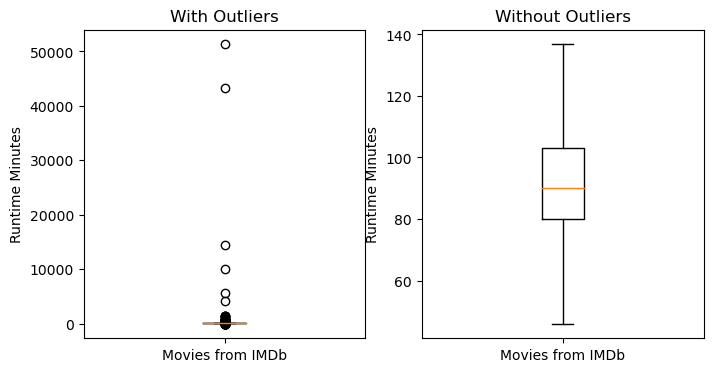

In [60]:
# generating boxplots of all movies and their runtime minutes
fig, axes = plt.subplots(1,2,figsize=(8,4))
axes[0].boxplot(df_imdb['runtimeMinutes'])
axes[1].boxplot(df_imdb['runtimeMinutes'], showfliers=False)
axes[0].title.set_text('With Outliers')
axes[1].title.set_text('Without Outliers')
axes[0].set_xlabel("Movies from IMDb")
axes[1].set_xlabel("Movies from IMDb")
axes[0].set_ylabel("Runtime Minutes")
axes[1].set_ylabel("Runtime Minutes")
axes[0].xaxis.set_tick_params(labelbottom=False)
axes[1].xaxis.set_tick_params(labelbottom=False);

From the boxplots, we can see multiple movies that exceed 10000 minutes (166.67 hours), which may significantly skew our data. For the sake of regular distribution, I will be focusing on movies less than 300 minutes (5 hours). 

I also decided to categorise runtime minutes into 30 minute increments so that we could compare groups of movie lengths.

In [61]:
# remove movies that exceed 300 minutes 
df_imdb = df_imdb[df_imdb.runtimeMinutes < 300]

In [62]:
# binning runtime minutes data into 30 minutes increments
df_imdb['runtimeMinutes'] = pd.cut(df_imdb['runtimeMinutes'], \
       bins = [0, 30, 60, 90, 120, 150, 180, 210, 240, 270, 300], \
       labels=['< 30', '30-60', '60-90', '90-120', '120-150', '150-180', '180-210', '210-240', '240-270', '270+'])

Finally, I dropped ```titleType```, ```startYear```, and ```genres``` as they irrelevant to my analysis.

In [63]:
# dropping unnecessary columns
df_imdb.drop(['titleType', 'genres'], axis=1, inplace=True)

In [64]:
df_imdb.head()

,movie_title,startYear,runtimeMinutes,averageRating,numVotes
tconst,,,,,
tt0013274,Istoriya Grazhdanskoy Voyny (2021),2021,90-120,6.8,57
tt0062336,The Tango Of The Widower And Its Distorting Mi...,2020,60-90,6.4,176
tt0068865,Lives Of Performers (2016),2016,60-90,5.4,75
tt0069049,The Other Side Of The Wind (2018),2018,120-150,6.7,7777
tt0096235,Taxi Killer (2022),2022,90-120,5.9,63


## Data Analysis
### The Numbers data

#### What is the relationship between production budget and global profit/ profitability?

I began my data analysis by exploring the relationship between production budget and global profit using The Numbers data.

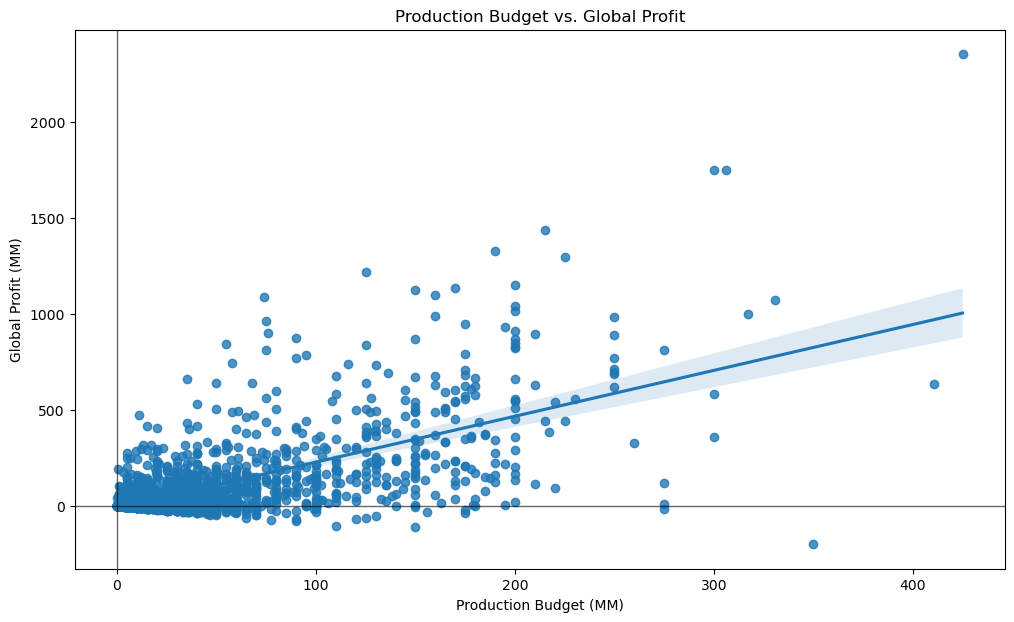

In [65]:
fig, ax = plt.subplots(figsize=(12,7))

sns.regplot(x='production_budget_mil', y='global_profit_mil', data=df1).set(title='Production Budget vs. Global Profit')
plt.axvline(0, color='black', linewidth=1, alpha=0.6)
plt.axhline(0, color='black', linewidth=1, alpha=0.6)

plt.xlabel('Production Budget (MM)')
plt.ylabel('Global Profit (MM)');

In [66]:
# looking at the correlation between production budget and global profit using Pearson's correlation coefficient r
corr_budget_profit = np.corrcoef(df1.production_budget_mil, df1.global_profit_mil)[0,1] 
print(f'Calculated Pearson Correlation (r) between production budget and global profit is: \
{"{0:.2f}".format(corr_budget_profit)}')

Calculated Pearson Correlation (r) between production budget and global profit is: 0.68


From the line of regression in the above scatter plot, we can see that as production budget increases, there is also a general increase in global profit although there is some variability, especially as move up the production budget axis. Pearson's correlation coefficient measures to be r=0.68, which shows a moderate to strong positive correlation between production budget and global profit. 

While this confirms that the higher budget the more global profit the film will pull in, we need to focus on our ROI metric to assess profitability.

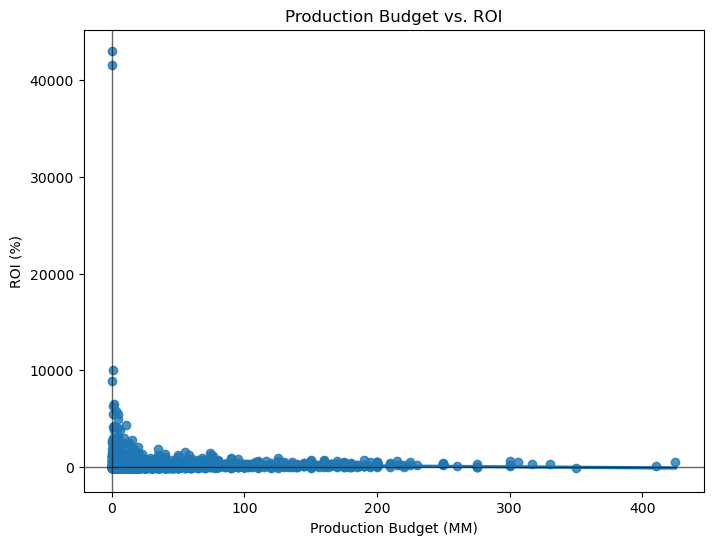

In [67]:
fig, ax = plt.subplots(figsize=(8,6))

sns.regplot(x='production_budget_mil', y='roi', data=df1).set(title='Production Budget vs. ROI')
plt.axvline(0, color='black', linewidth=1, alpha=0.6)
plt.axhline(0, color='black', linewidth=1, alpha=0.6)

plt.xlabel('Production Budget (MM)')
plt.ylabel('ROI (%)');

In [68]:
# looking at the correlation between production budget and global profit using Pearson's correlation coefficient r
corr_budget_roi = np.corrcoef(df1.production_budget_mil, df1.roi)[0,1] 
print(f'Calculated Pearson Correlation (r) between production budget and ROI is: \
{"{0:.2f}".format(corr_budget_roi)}')

Calculated Pearson Correlation (r) between production budget and ROI is: -0.04


We can see that there is great variability between production budget and ROI, with r=-0.04 showing a low negative correlation between the two variables. From a visual assessment of the above visualisation, my hypothesis is that the low-budget films yielding an extremely high ROI are skewing results. 

To investigate this further, I looked into the relationship between each budget level with production budget, worldwide gross, global profit and ROI. I focused on the median given the presence of outliers.

In [69]:
# creating a new dataframe grouped by budget tier and looking at the median statistics of each numeric column 
groupedby_budget = df1.groupby(df1.production_budget_tier).median(numeric_only=True)
groupedby_budget.columns = [col + '_median' for col in groupedby_budget.columns]
# appending a column with the count of movies to see distribution
groupedby_budget['count_of_movies'] = df1.groupby(df1.production_budget_tier)['movie_title'].count()
groupedby_budget.reset_index(inplace=True)
groupedby_budget

,production_budget_tier,production_budget_mil_median,worldwide_gross_mil_median,global_profit_mil_median,roi_median,count_of_movies
0,Low,2.0,1.577585,0.088390,7.009267,459
1,Medium,20.0,36.588512,14.551283,80.738155,1183
2,High,100.0,276.471539,160.845456,162.844521,498


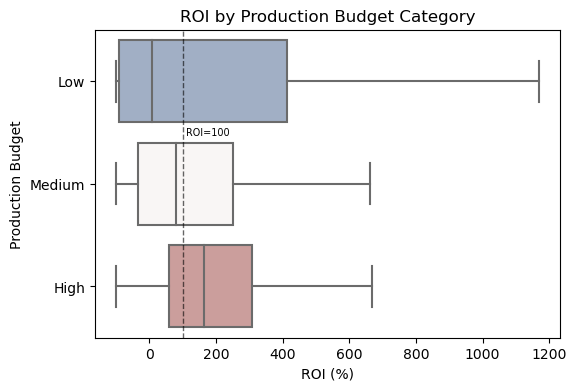

In [70]:
fig, ax = plt.subplots(figsize=(6,4))
sns.boxplot(x=df1.roi, y=df1.production_budget_tier, showfliers=False, palette='vlag').set(title="ROI by Production Budget Category")

plt.xlabel('ROI (%)')
plt.ylabel('Production Budget')
plt.axvline(100, color='black', linestyle='--', linewidth=1, alpha=0.6)
plt.text(110,0.53, 'ROI=100', fontsize='x-small');

We can see the high-end films yield the highest median ROI and is the only production budget category with a median higher than an ROI of 100. This supports the idea that high production budget films will typically yield a higher ROI and pull in a greater global profit.

While low-budget films have the lowest median ROI of 7%, barely breaking even, it also has the highest variability with 75% of their films yielding a ROI of more than 400%. This would be an interesting avenue to explore for studios with a limited budget.

#### Does release month have a relationship on ROI?

Now that we have established that for maximum profits, a higher production budget is necessary, I decided to explore whether release month had an impact on profitability. Are there certain seasons or periods where movies will generate a higher profit?

I used the same method as I did when looking at the relationship between budget categories and profitability.

In [71]:
groupedby_month = df1.groupby(df1.release_date.dt.month).median(numeric_only=True)
groupedby_month.columns = [col + '_median' for col in groupedby_month.columns]
groupedby_month['count_of_movies'] = df1.groupby(df1.release_date.dt.month)['movie_title'].count()
groupedby_month.reset_index(inplace=True)
groupedby_month.head()

,release_date,production_budget_mil_median,worldwide_gross_mil_median,global_profit_mil_median,roi_median,count_of_movies
0,1,23.0,48.437072,19.780530,112.033036,142
1,2,26.5,51.392713,22.200023,116.267777,156
2,3,20.0,36.715516,14.953905,89.926215,182
3,4,17.0,23.910210,6.594052,52.339267,189
4,5,25.0,58.329674,30.621358,118.073048,158


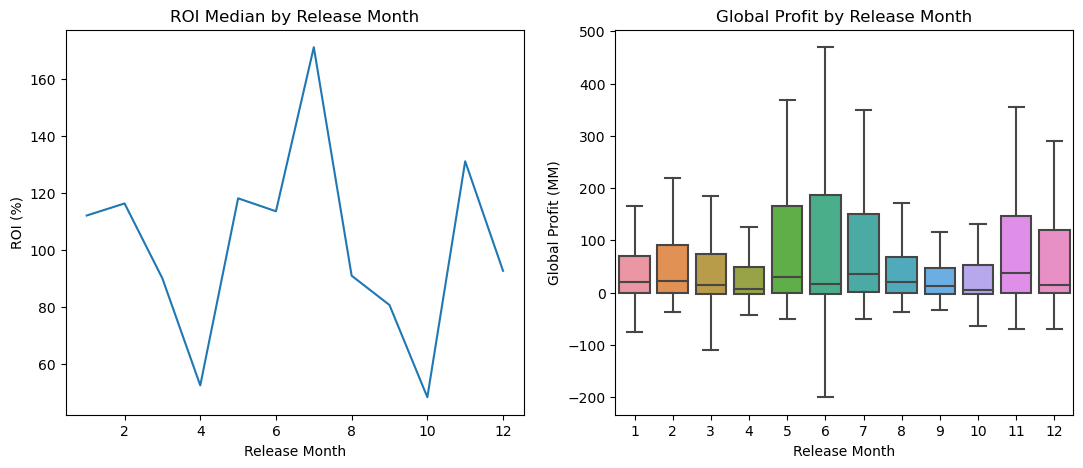

In [72]:
fig, axes = plt.subplots(1,2,figsize=(13,5))
sns.lineplot(x=groupedby_month.release_date, y=groupedby_month.roi_median, ax=axes[0]).set(title="ROI Median by Release Month")
sns.boxplot(x=df1.release_date.dt.month, y=df1.global_profit_mil, showfliers=False, ax=axes[1]).set(title="Global Profit by Release Month")
axes[0].set_xlabel("Release Month")
axes[1].set_xlabel("Release Month")
axes[0].set_ylabel("ROI (%)")
axes[1].set_ylabel("Global Profit (MM)");

We can see that median ROI tends to be the highest during summer months of the Northern hemisphere and towards the end of the year. This aligns with the holiday periods of the Northern hemisphere and suggests people are more likely to watch movies during these months. We also see an increase in February, which potentially could be attributed to Valentine's Day.

We will now investigate whether genre has an impact on profitability.

### The Numbers and TMDb
#### Are certain genres more profitable than other?

Looking at the joined Numbers and TMDb dataframe, we can see that movies are assigned to multiple genres. So that we can investigate each genre individually, I have decided to explode the dataframe so that each movie may appear multiple times but the genre exists on its own row.

In [73]:
# exploding by genre so that we can groupby genre
df_bygenre = df_tn_tmdb.explode('genre_ids')
df_bygenre.head()

,release_date,movie_title,production_budget_mil,worldwide_gross_mil,global_profit_mil,roi,production_budget_tier,genre_ids,vote_average,vote_count
0,2009-12-18,Avatar (2009),425.0,2776.345279,2351.345279,553.257713,High,Adventure,7.4,18676
0,2009-12-18,Avatar (2009),425.0,2776.345279,2351.345279,553.257713,High,Fantasy,7.4,18676
0,2009-12-18,Avatar (2009),425.0,2776.345279,2351.345279,553.257713,High,Action,7.4,18676
0,2009-12-18,Avatar (2009),425.0,2776.345279,2351.345279,553.257713,High,Science Fiction,7.4,18676
1,2011-05-20,Pirates Of The Caribbean: On Stranger Tides (2...,410.6,1045.663875,635.063875,154.667286,High,Adventure,6.4,8571


In [74]:
groupedby_genre = df_bygenre.groupby(df_bygenre.genre_ids).median(numeric_only=True)
groupedby_genre.columns = [col + '_median' for col in groupedby_genre.columns]
groupedby_genre['count_of_movies'] = df_bygenre.groupby(df_bygenre.genre_ids)['movie_title'].count()
groupedby_genre.reset_index(inplace=True)
groupedby_genre.head()

,genre_ids,production_budget_mil_median,worldwide_gross_mil_median,global_profit_mil_median,roi_median,vote_average_median,vote_count_median,count_of_movies
0,Action,61.0,141.507355,70.497035,129.114186,6.20,2394.0,387
1,Adventure,110.0,276.471539,153.180847,166.249253,6.35,3186.0,272
2,Animation,85.0,333.771037,219.150134,200.916073,6.60,1851.0,97
3,Comedy,28.0,69.807260,35.768579,155.968362,6.20,968.0,493
4,Crime,30.0,46.341481,16.344860,66.971321,6.30,1186.0,202


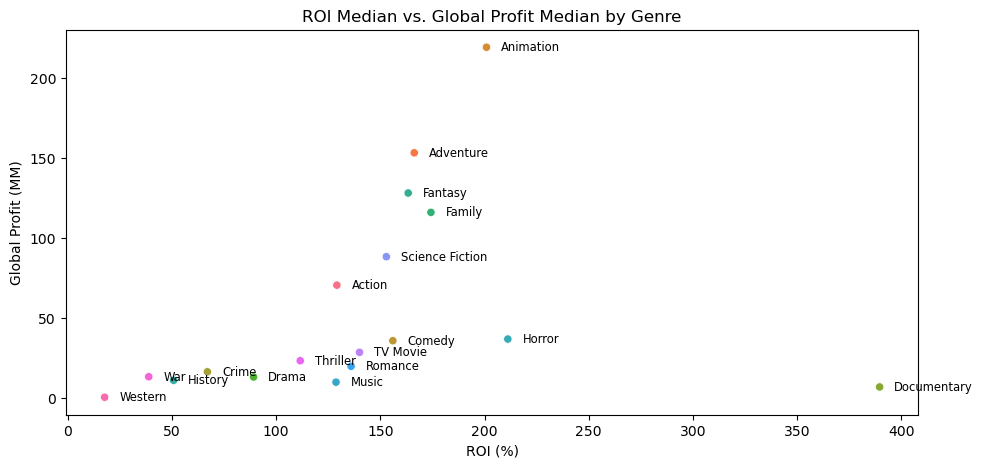

In [75]:
fig, ax = plt.subplots(figsize=(11,5))
sns.scatterplot(x='roi_median', y='global_profit_mil_median', data=groupedby_genre, hue='genre_ids', legend=False)\
.set(title='ROI Median vs. Global Profit Median by Genre')

plt.xlabel('ROI (%)')
plt.ylabel('Global Profit (MM)')

# add data label for each genre
for i, genre in enumerate(groupedby_genre.genre_ids):
    plt.text(groupedby_genre.roi_median[i]+7, groupedby_genre.global_profit_mil_median[i]-2, genre, fontsize='small');

From the scatterplot above, we can see that while Horror and Documentary genres have the highest ROI, their global profits are on the lower end given their smaller budgets. For the best chances of profitability, my recommendation would be to produce an Animation, Adventure, Fantasy or Family film with a high-end budget.

#### Is there a relationship between vote average and profitability?

I wanted to investigate whether there was a relationship between audience sentiment (as defined by the vote average) and profitability. For example, if audiences rated a film highly, would that reflect a greater profit or ROI?

Below, I looked at the Pearson correlation coefficient between vote average and ROI, and vote average and global profit.

In [76]:
# calculating r for vote average and ROI
corr_vote_avg_roi = np.corrcoef(df_tn_tmdb.vote_average, df_tn_tmdb.roi)[0,1] 
print(f'Calculated Pearson Correlation (r) between vote average and ROI is: \
{"{0:.2f}".format(corr_vote_avg_roi)}')

Calculated Pearson Correlation (r) between vote average and ROI is: 0.01


In [77]:
# calculating r for vote average and global profit
corr_vote_avg_global_profit = np.corrcoef(df_tn_tmdb.vote_average, df_tn_tmdb.global_profit_mil)[0,1] 
print(f'Calculated Pearson Correlation (r) between vote average and global profit is: \
{"{0:.2f}".format(corr_vote_avg_global_profit)}')

Calculated Pearson Correlation (r) between vote average and global profit is: 0.30


There appears to be no correlation between vote average and ROI and a low positive correlation between vote average and global profit.

### IMDb
#### What is the relationship between runtimes and average ratings?

While we have established there is no correlation between average ratings and the profitability of the movie, I decided to take a look at whether certain runtimes have higher averaging ratings than others to provide a guide of how long a movie should be.

In [78]:
groupedby_runtime = df_imdb.groupby(df_imdb.runtimeMinutes).median(numeric_only=True)
groupedby_runtime.columns = [col + '_median' for col in groupedby_runtime.columns]
groupedby_runtime.reset_index(inplace=True)
groupedby_runtime.head()

,runtimeMinutes,startYear_median,averageRating_median,numVotes_median
0,< 30,2014.0,7.3,16.0
1,30-60,2015.0,7.1,18.0
2,60-90,2016.0,6.3,57.0
3,90-120,2016.0,6.3,153.0
4,120-150,2017.0,6.5,251.0


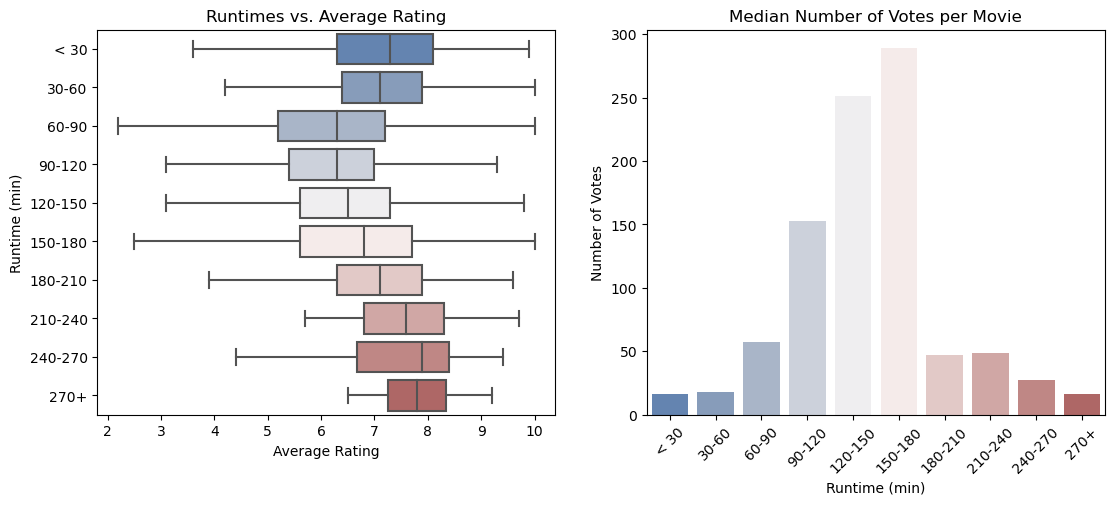

In [79]:
fig, axes = plt.subplots(1, 2, figsize=(13,5))
sns.boxplot(x='averageRating', y='runtimeMinutes', data=df_imdb, showfliers=False, palette="vlag", ax=axes[0])\
.set(title='Runtimes vs. Average Rating')
sns.barplot(x='runtimeMinutes', y='numVotes_median', data=groupedby_runtime, palette="vlag", errorbar=None, ax=axes[1])\
.set(title='Median Number of Votes per Movie')
plt.xticks(rotation=45)

axes[0].set_xlabel("Average Rating")
axes[1].set_xlabel("Runtime (min)")
axes[0].set_ylabel("Runtime (min)")
axes[1].set_ylabel("Number of Votes");

We can see that as runtime increases, so does the median average rating. However, note that the median number of votes per movie also drops significantly for movies over 180 minutes. The smaller sample size suggests that these movies are less popular and appeal to a niche audience.

Based on the above visualisations, it appears that movies with a runtime of 150 to 180 minutes have a higher average rating. However, it is important to keep in mind that we did not find a correlation between audience sentiment and average rating, and while audience may enjoy movies between 150 to 180 minutes more it does not speak to profitability. Further analysis will need to be conducted to assess whether runtimes impact profitability.

## Conclusions

From the above analysis, I would recommend the following actionable insights to produce a successful film: 

* **Invest in a high-end production budget of at least 50 million USD to maximise profitability.** While low-budget movies have the potential to yield significant ROI, profits will remain low. High-end films not only yield a high ROI but also a signficant global profit.
* **Produce an Animated film within the Adventure, Fantasy, and/or Family genre.** The median global profit of an Animation film is over $200MM with a median ROI of 200%. Adventure, Fantasy and Family genres have also shown to yield high ROI and global profits. 
* **Release the film during July.** July sees the highest median ROI and greatest median global profits. This month corresponds with summer holidays in the Northern hemisphere and it is likely more people, particularly families, are watching movies during this break.

## Evaluation

#### Limitations and Further Considerations 


A significant limitation of this analysis is that the data was limited to 2019. Below is a graph that demonstrates the impact of COVID-19 on the number of films released per year:

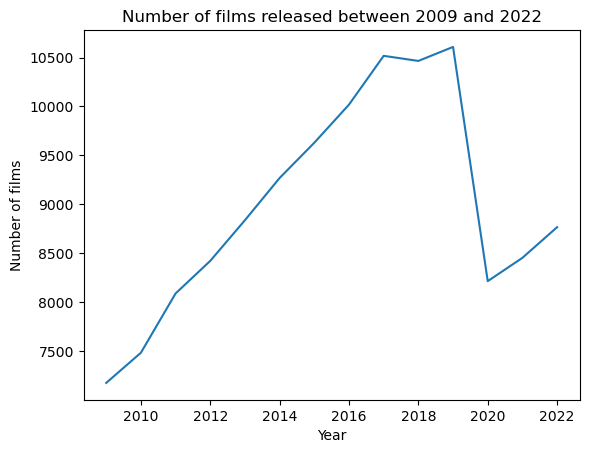

In [80]:
groupedby_year = df_imdb.groupby(['startYear']).count().reset_index()

fig, ax = plt.subplots()
ax.plot(groupedby_year['startYear'], groupedby_year['movie_title'])
ax.set_title('Number of films released between 2009 and 2022')

plt.xlabel('Year')
plt.ylabel('Number of films');

So that we can assess the influence of the pandemic on box office numbers, we would need to analyse data from 2020 to 2022. 

While the IMDb data did include films up until 2022, this dataframe was only used to assess the relationship between average rating and runtimes. Given that we established there was no relationship between average ratings with profitability, further research needs to be conducted to examine the influence of runtime on profitability or if there is any relationship at all.

Another consideration to take is the introduction of streaming services and their impact on the film industry. Given the ease of accessibility and its private, household use, streaming services have influenced the way audiences consume film. Since Amazon Prime Video and Netflix launched their streaming services in 2006 and 2007 respectively, the streaming industry has grown exponentially. 

This analysis provides a thorough exploration of box office successes from 2009 to 2019 and has considered multiple variables that may contribute to a film's overall success. Given the large sample size and timeline of the analysis, I am confident that with the actionable insights recommended, Microsoft would be able to produce a movie that would be financially successful. To take into consideration the changes to the film industry in the recent years, further analysis is recommended so that Microsoft can maximise profits across all platforms.